In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import BernoulliRBM

# 15 materials
material = pd.DataFrame({
    'material_id': list(range(101, 121)),
    'subject': ['AI', 'Blockchain', 'Sustainability', 'Robotics', 'Environmental Science', 'Data Science', 'Cybersecurity',
                'Physics', 'Mathematics', 'Chemistry', 'Astronomy', 'Quantum Computing', 'Biotechnology', 'Machine Learning',
                'Renewable Energy', 'Ethics in AI', 'Web Development', 'Embedded Systems', 'IoT', 'Cloud Computing'],
    'difficulty_level': ['Medium', 'Hard', 'Medium', 'Hard', 'Easy', 'Hard', 'Medium', 'Hard', 'Medium', 'Medium',
                         'Hard', 'Hard', 'Medium', 'Medium', 'Medium', 'Hard', 'Easy', 'Medium', 'Hard', 'Easy'],
    'popularity_score': [
        65.3, 72.5, 88.7, 91.4, 79.2, 86.1, 73.4, 67.8,
        94.5, 60.2, 77.1, 82.9, 68.4, 90.0, 84.3, 78.8,
        92.7, 63.5, 70.1, 89.6
    ],
    'content_length': [
        15.2, 22.6, 35.1, 27.8, 33.4, 12.3, 30.5, 28.9,
        14.8, 37.2, 18.9, 24.6, 10.5, 20.1, 36.4, 19.8,
        12.7, 31.5, 25.9, 11.4
    ]
})

# 10 students
student = pd.DataFrame({
    'student_id': list(range(1, 11)),
    'name': ['John Doe', 'Jane Smith', 'Sam Lee', 'Alex Chen', 'Maria Perez', 'Tom White', 'Sophia Brown',
             'Liam Green', 'Olivia Black', 'Emma Gray'],
    'course': ['Computer Science', 'Mechanical Engineering', 'Civil Engineering', 'Computer Science', 'Electrical Engineering',
               'Physics', 'Biology', 'Mathematics', 'Cybersecurity', 'Mechanical Engineering'],
    'year': [3, 2, 4, 1, 3, 2, 4, 1, 3, 2],
    'avg_quiz_score': [78, 65, 85, 55, 70, 63, 88, 57, 74, 68],
    'interests': ['AI, Blockchain', 'Environmental Science, AI', 'Sustainability, Data Science', 'AI, Fintech',
                  'Robotics, Blockchain', 'Quantum Computing, Physics', 'Biotechnology, Data Science',
                  'Mathematics, AI', 'Cybersecurity, IoT', 'Mechanical Engineering, Robotics']
})

# 30 Interactions
engagement = pd.DataFrame({
    'student_id': [
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
        1, 2, 3, 4, 5, 6, 7, 8, 9, 10
    ],
    'material_id': [
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        101, 102, 103, 104, 105, 106, 107, 108, 109, 110
    ],
    'rating': [
        4, 5, 3, 4, 5, 2, 3, 5, 4, 4,
        3, 5, 2, 4, 3, 5, 2, 4, 4, 5,
        2, 3, 5, 4, 3, 2, 4, 5, 3, 2
    ],
    'viewed': [
        'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
        'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
        'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y'
    ]
})


# Recommend top 5 materials
def recommend_materials_rbm(student_id, top_n=5):
    student_index = interaction_matrix.index.get_loc(student_id)
    scores = student_scores[student_index]
    material_scores = pd.Series(scores, index=interaction_matrix.columns)
    material_scores = material_scores.sort_values(ascending=False)
    viewed_materials = engagement_data[engagement_data['student_id'] == student_id]['material_id'] # filter out material already viewed
    recommendations = material_scores[~material_scores.index.isin(viewed_materials)].head(top_n)

    return recommendations


### Training

In [7]:
encoder = OneHotEncoder()
interaction_matrix = pd.pivot_table(engagement_data, values='rating', index='student_id', columns='material_id', fill_value=0)

rbm = BernoulliRBM(n_components=len(interaction_matrix.columns), random_state=42)
rbm.fit(interaction_matrix)

student_scores = rbm.transform(interaction_matrix)

### Inference

In [8]:
for student_id in student['student_id']:
    print(f"Recommendations for Student {student_id}:")
    print(recommend_materials_rbm(student_id), '\n')

Recommendations for Student 1:
material_id
112    0.430894
102    0.425805
103    0.423975
114    0.423708
110    0.417065
dtype: float64 

Recommendations for Student 2:
material_id
118    0.524032
104    0.509062
108    0.505010
105    0.502934
119    0.501996
dtype: float64 

Recommendations for Student 3:
material_id
105    0.441947
111    0.441919
115    0.440977
107    0.439853
118    0.438581
dtype: float64 

Recommendations for Student 4:
material_id
113    0.493738
106    0.491110
117    0.483956
120    0.482533
111    0.480444
dtype: float64 

Recommendations for Student 5:
material_id
119    0.447761
112    0.438167
109    0.428224
116    0.428022
108    0.424149
dtype: float64 

Recommendations for Student 6:
material_id
107    0.570898
104    0.543636
112    0.537822
110    0.530388
103    0.525901
dtype: float64 

Recommendations for Student 7:
material_id
114    0.451579
106    0.447057
116    0.441263
101    0.438652
105    0.437623
dtype: float64 

Recommendations for 

### Visualizations

#### Heatmap


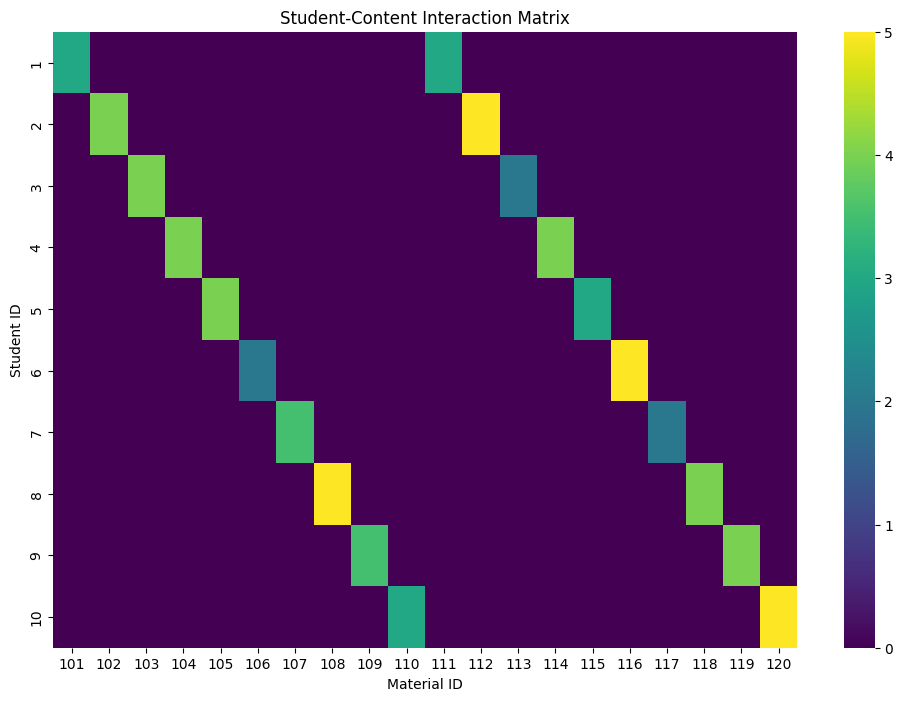

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='viridis')
plt.title('Student-Content Interaction Matrix')
plt.xlabel('Material ID')
plt.ylabel('Student ID')
plt.show()

#### Rating Distribution

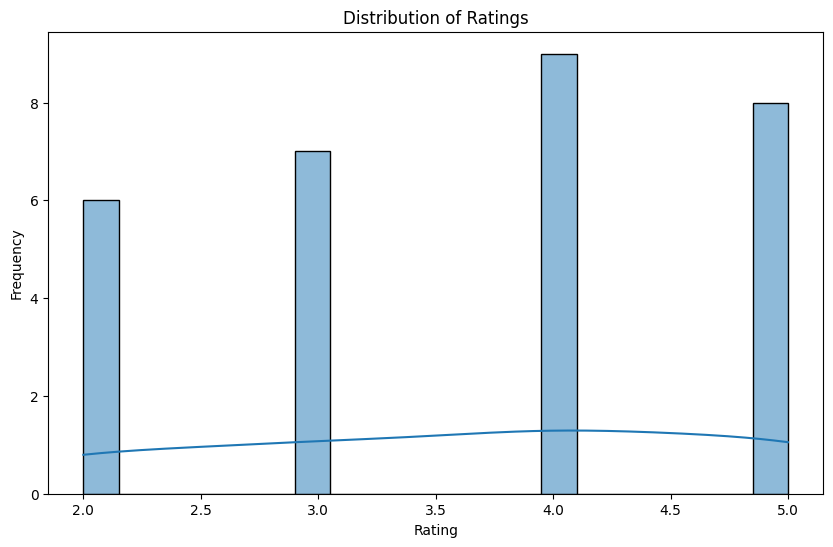

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(engagement_data['rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Dimensionally Reduced Visualizations

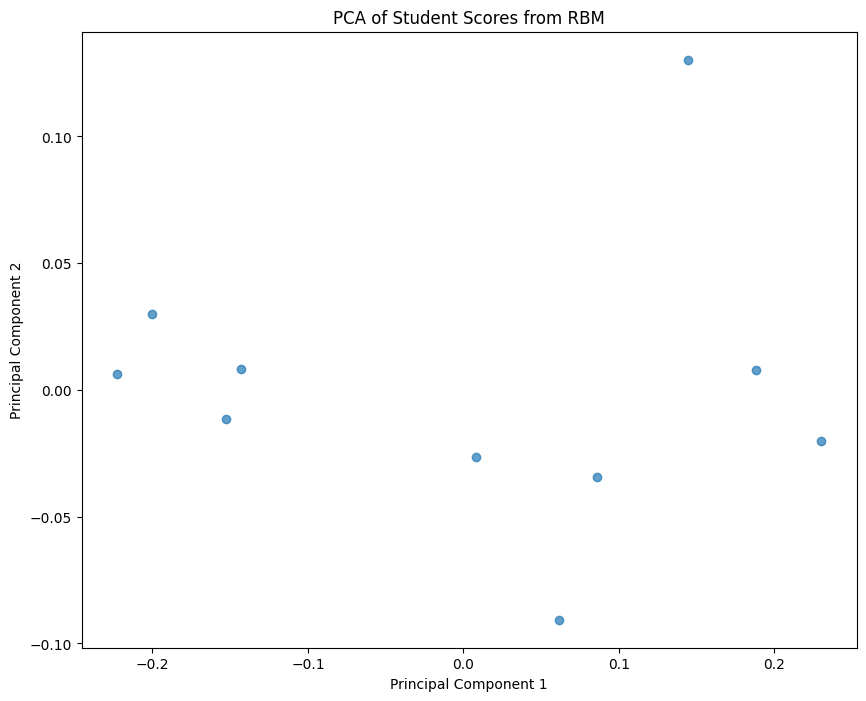

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(student_scores)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7)
plt.title('PCA of Student Scores from RBM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Show that certain students here have similar viewing history and thus the recommendations to them will also be pretty similar